# **Projeto | Engenharia de Dados - Enem 2024**

# Modelagem dos Dados

In [1]:
# Frameworks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import datetime

# Avisos
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

# Driver
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Local do diretorio
local = '/content/drive/MyDrive/Projeto_enem/bronze/'

# Dados do projeto
base_resultado = 'RESULTADOS_2024.csv'
base_participantes = 'PARTICIPANTES_2024.csv'

In [3]:
# Converter para arquivo .parquet os dados

df_resultado = pd.read_csv(local + base_resultado, encoding='latin1' ,sep=';')

df_resultado.to_parquet(
    path=local +'df_resultado_parquet.parquet.gzip',
    compression='gzip',
    index=False
)

df_participantes = pd.read_csv(local + base_participantes, encoding='latin1' ,sep=';')

df_participantes.to_parquet(
    path=local +'df_participantes_parquet.parquet.gzip',
    compression='gzip',
    index=False
)


In [4]:
# Lendo arquivo .parquet

arquivo_comprimido = 'df_resultado_parquet.parquet.gzip'
df_resultado = pd.read_parquet(local+arquivo_comprimido)

In [5]:
df_resultado.head()

,NU_SEQUENCIAL,NU_ANO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,206403,2024,23052929.00,2301406.00,Aratuba,23.00,CE,2.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,80.00,60.00,60.00,80.00,20.00,300.00
1,3604651,2024,42103770.00,4218004.00,Tijucas,42.00,SC,4.00,1.00,1.00,...,DADABCDCECEDEBBBEBCDBADACBCADCEBEADBAECAECEDA,AACEADDDACDADECBBDBEEBDDECCBEDDCADBBDEBCEBDCEC...,DBCECEACADABBECBEDADCCDCCABBBCECEBCEADABBADDD,1.00,160.00,200.00,200.00,180.00,180.00,920.00
2,1461268,2024,NaN,NaN,None,NaN,None,NaN,NaN,NaN,...,CAEDBADBEBCCEDADBAEACBCADCEDEBBEBACECEABCDDAD,EAAACDDCDADDCBDEECEECBDCDADEEBCBEBADBCEBDBDDDD...,ABBABBADDDBBCECEADCEBCCCDBADCBEDAECADACDBCECE,1.00,120.00,120.00,40.00,120.00,80.00,480.00
3,4301058,2024,NaN,NaN,None,NaN,None,NaN,NaN,NaN,...,ACBCADCEDBAECEDADBADBEBCDADABCDEABCAEDEBBCECE,AACEADACDDCBEDADEEBDDBDBBCEECBDCBADDDCBDEDDCEC...,CEBCEADBBCEADDDABBABBCCDCCECEDBACADECABEDADCB,1.00,140.00,200.00,160.00,160.00,80.00,740.00
4,3148322,2024,21150354.00,2100436.00,Alto Alegre do Maranhão,21.00,MA,2.00,1.00,1.00,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Filtro Regional

# Setar parâmetros
estado = 'MG'
cidade = 'Belo Horizonte'

filtro_cidade = (
    df_resultado.loc[
        (df_resultado['SG_UF_ESC'] == estado) &
        (df_resultado['NO_MUNICIPIO_ESC'] == cidade)
    ]
)

In [7]:
# Verificação

filtro_cidade.head()

,NU_SEQUENCIAL,NU_ANO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
82,701795,2024,31000311.00,3106200.00,Belo Horizonte,31.00,MG,2.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,180.00,200.00,160.00,180.00,200.00,920.00
118,3520358,2024,31002348.00,3106200.00,Belo Horizonte,31.00,MG,2.00,1.00,1.00,...,ACBCADCEDBAECEDADBADBEBCDADABCDEABCAEDEBBCECE,AACEADACDDCBEDADEEBDDBDBBCEECBDCBADDDCBDEDDCEC...,CEBCEADBBCEADDDABBABBCCDCCECEDBACADECABEDADCB,1.00,100.00,140.00,120.00,120.00,60.00,540.00
258,2980778,2024,31000311.00,3106200.00,Belo Horizonte,31.00,MG,2.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,120.00,160.00,120.00,160.00,160.00,720.00
698,2999683,2024,31007561.00,3106200.00,Belo Horizonte,31.00,MG,4.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,160.00,160.00,160.00,180.00,200.00,860.00
797,1229200,2024,31000434.00,3106200.00,Belo Horizonte,31.00,MG,2.00,1.00,1.00,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Corrigindo o index

filtro_cidade.reset_index(drop=True, inplace=True)
filtro_cidade.head()

,NU_SEQUENCIAL,NU_ANO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,701795,2024,31000311.00,3106200.00,Belo Horizonte,31.00,MG,2.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,180.00,200.00,160.00,180.00,200.00,920.00
1,3520358,2024,31002348.00,3106200.00,Belo Horizonte,31.00,MG,2.00,1.00,1.00,...,ACBCADCEDBAECEDADBADBEBCDADABCDEABCAEDEBBCECE,AACEADACDDCBEDADEEBDDBDBBCEECBDCBADDDCBDEDDCEC...,CEBCEADBBCEADDDABBABBCCDCCECEDBACADECABEDADCB,1.00,100.00,140.00,120.00,120.00,60.00,540.00
2,2980778,2024,31000311.00,3106200.00,Belo Horizonte,31.00,MG,2.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,120.00,160.00,120.00,160.00,160.00,720.00
3,2999683,2024,31007561.00,3106200.00,Belo Horizonte,31.00,MG,4.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,160.00,160.00,160.00,180.00,200.00,860.00
4,1229200,2024,31000434.00,3106200.00,Belo Horizonte,31.00,MG,2.00,1.00,1.00,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Verificação de campos nulos

filtro_cidade.isnull().sum() / filtro_cidade.shape[0] * 100

,0
NU_SEQUENCIAL,0.00
NU_ANO,0.00
CO_ESCOLA,0.00
CO_MUNICIPIO_ESC,0.00
NO_MUNICIPIO_ESC,0.00
CO_UF_ESC,0.00
SG_UF_ESC,0.00
TP_DEPENDENCIA_ADM_ESC,0.00
TP_LOCALIZACAO_ESC,0.00
TP_SIT_FUNC_ESC,0.00


In [10]:
# Campos únicos

filtro_cidade.nunique()

,0
NU_SEQUENCIAL,15137
NU_ANO,1
CO_ESCOLA,263
CO_MUNICIPIO_ESC,1
NO_MUNICIPIO_ESC,1
CO_UF_ESC,1
SG_UF_ESC,1
TP_DEPENDENCIA_ADM_ESC,4
TP_LOCALIZACAO_ESC,1
TP_SIT_FUNC_ESC,1


In [11]:
# Tipos de campos

filtro_cidade.dtypes.value_counts()

,count
float64,21
object,12
int64,9


In [12]:
# Redefinir nomes das colunas minúsculo

filtro_cidade.columns = [Loop.lower() for Loop in filtro_cidade.columns]
filtro_cidade.columns

Index(['nu_sequencial', 'nu_ano', 'co_escola', 'co_municipio_esc',
       'no_municipio_esc', 'co_uf_esc', 'sg_uf_esc', 'tp_dependencia_adm_esc',
       'tp_localizacao_esc', 'tp_sit_func_esc', 'co_municipio_prova',
       'no_municipio_prova', 'co_uf_prova', 'sg_uf_prova', 'tp_presenca_cn',
       'tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt', 'co_prova_cn',
       'co_prova_ch', 'co_prova_lc', 'co_prova_mt', 'nu_nota_cn', 'nu_nota_ch',
       'nu_nota_lc', 'nu_nota_mt', 'tx_respostas_cn', 'tx_respostas_ch',
       'tx_respostas_lc', 'tx_respostas_mt', 'tp_lingua', 'tx_gabarito_cn',
       'tx_gabarito_ch', 'tx_gabarito_lc', 'tx_gabarito_mt',
       'tp_status_redacao', 'nu_nota_comp1', 'nu_nota_comp2', 'nu_nota_comp3',
       'nu_nota_comp4', 'nu_nota_comp5', 'nu_nota_redacao'],
      dtype='object')

In [13]:
filtro_cidade.head()

,nu_sequencial,nu_ano,co_escola,co_municipio_esc,no_municipio_esc,co_uf_esc,sg_uf_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,...,tx_gabarito_ch,tx_gabarito_lc,tx_gabarito_mt,tp_status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nu_nota_redacao
0,701795,2024,31000311.00,3106200.00,Belo Horizonte,31.00,MG,2.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,180.00,200.00,160.00,180.00,200.00,920.00
1,3520358,2024,31002348.00,3106200.00,Belo Horizonte,31.00,MG,2.00,1.00,1.00,...,ACBCADCEDBAECEDADBADBEBCDADABCDEABCAEDEBBCECE,AACEADACDDCBEDADEEBDDBDBBCEECBDCBADDDCBDEDDCEC...,CEBCEADBBCEADDDABBABBCCDCCECEDBACADECABEDADCB,1.00,100.00,140.00,120.00,120.00,60.00,540.00
2,2980778,2024,31000311.00,3106200.00,Belo Horizonte,31.00,MG,2.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,120.00,160.00,120.00,160.00,160.00,720.00
3,2999683,2024,31007561.00,3106200.00,Belo Horizonte,31.00,MG,4.00,1.00,1.00,...,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.00,160.00,160.00,160.00,180.00,200.00,860.00
4,1229200,2024,31000434.00,3106200.00,Belo Horizonte,31.00,MG,2.00,1.00,1.00,...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# De para

dicionario_adm_escola = {
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}

dicionario_localizacao_escola = {
    1: 'Urbana',
    2: 'Rural'
}

dicionario_status_redacao = {
    1: 'sem_problemas',
    2: 'anulada',
    3: 'copia_texto_motivador',
    4: 'em_branco',
    6: 'fuga_ao_tema',
    7: 'nao_atendimento_ao_tipo_textual',
    8: 'texto_insuficiente',
    9: 'parte_desconectada'
}

# Aplicar as transformações

filtro_cidade['tp_adm_escola'] = filtro_cidade.tp_dependencia_adm_esc.map(dicionario_adm_escola)
filtro_cidade['tp_loc_escola'] = filtro_cidade.tp_localizacao_esc.map(dicionario_localizacao_escola)
filtro_cidade['status_redacao'] = filtro_cidade.tp_status_redacao.map(dicionario_status_redacao)

# Tratando idioma escolhido

filtro_cidade['idioma_estrangeiro'] = np.where(filtro_cidade.tp_lingua == 0, 'Inglês', 'Espanhol')

filtro_cidade.iloc[0:10, -5:]

,nu_nota_redacao,tp_adm_escola,tp_loc_escola,status_redacao,idioma_estrangeiro
0,920.00,Estadual,Urbana,sem_problemas,Inglês
1,540.00,Estadual,Urbana,sem_problemas,Espanhol
2,720.00,Estadual,Urbana,sem_problemas,Inglês
3,860.00,Privada,Urbana,sem_problemas,Inglês
4,NaN,Estadual,Urbana,NaN,Espanhol
5,740.00,Privada,Urbana,sem_problemas,Inglês
6,840.00,Privada,Urbana,sem_problemas,Inglês
7,880.00,Estadual,Urbana,sem_problemas,Inglês
8,280.00,Estadual,Urbana,sem_problemas,Espanhol
9,680.00,Estadual,Urbana,sem_problemas,Inglês


In [15]:
filtro_cidade.tp_adm_escola.value_counts()

,count
tp_adm_escola,
Estadual,9038
Privada,5335
Federal,748
Municipal,16


In [16]:
filtro_cidade.tp_loc_escola.value_counts()

,count
tp_loc_escola,
Urbana,15137


In [17]:
filtro_cidade.status_redacao.value_counts()

,count
status_redacao,
sem_problemas,13252
em_branco,121
fuga_ao_tema,33
copia_texto_motivador,26
texto_insuficiente,17
parte_desconectada,9
anulada,2
nao_atendimento_ao_tipo_textual,2


In [18]:
filtro_cidade.idioma_estrangeiro.value_counts()

,count
idioma_estrangeiro,
Inglês,11071
Espanhol,4066


In [19]:
filtro_cidade.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nu_sequencial,15137.00,1989933.92,1181542.73,332.00,936764.00,2006271.00,2945787.00,4325931.00
nu_ano,15137.00,2024.00,0.00,2024.00,2024.00,2024.00,2024.00,2024.00
co_escola,15137.00,31404892.60,3051724.43,31000019.00,31001457.00,31002453.00,31217263.00,60013076.00
co_municipio_esc,15137.00,3106200.00,0.00,3106200.00,3106200.00,3106200.00,3106200.00,3106200.00
co_uf_esc,15137.00,31.00,0.00,31.00,31.00,31.00,31.00,31.00
tp_dependencia_adm_esc,15137.00,2.66,1.01,1.00,2.00,2.00,4.00,4.00
tp_localizacao_esc,15137.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
tp_sit_func_esc,15137.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
co_municipio_prova,15137.00,3108947.15,37323.18,1506807.00,3106200.00,3106200.00,3106200.00,5103403.00
co_uf_prova,15137.00,31.01,0.36,15.00,31.00,31.00,31.00,51.00


In [20]:
# Separar o DataSet para a Camada Prata

colunas_notas = ['nu_nota_cn', 'nu_nota_ch', 'nu_nota_lc', 'nu_nota_mt', 'nu_nota_redacao']
colunas_presenca = ['tp_presenca_cn', 'tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt', 'status_redacao']
colunas_categoricas = ['no_municipio_esc', 'sg_uf_esc', 'tp_adm_escola', 'tp_loc_escola', 'idioma_estrangeiro']

# Configuração

colunas_para_filtrar = colunas_categoricas + colunas_presenca + colunas_notas
filtro_cidade[colunas_para_filtrar]


,no_municipio_esc,sg_uf_esc,tp_adm_escola,tp_loc_escola,idioma_estrangeiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao
0,Belo Horizonte,MG,Estadual,Urbana,Inglês,1,1,1,1,sem_problemas,520.10,566.20,577.20,491.70,920.00
1,Belo Horizonte,MG,Estadual,Urbana,Espanhol,1,1,1,1,sem_problemas,413.70,455.60,467.80,429.10,540.00
2,Belo Horizonte,MG,Estadual,Urbana,Inglês,1,1,1,1,sem_problemas,455.00,503.10,529.20,437.20,720.00
3,Belo Horizonte,MG,Privada,Urbana,Inglês,1,1,1,1,sem_problemas,425.90,493.30,521.30,502.90,860.00
4,Belo Horizonte,MG,Estadual,Urbana,Espanhol,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15132,Belo Horizonte,MG,Estadual,Urbana,Espanhol,1,1,1,1,sem_problemas,364.90,507.20,574.40,386.30,820.00
15133,Belo Horizonte,MG,Estadual,Urbana,Inglês,1,1,1,1,em_branco,545.40,440.60,491.20,442.90,0.00
15134,Belo Horizonte,MG,Estadual,Urbana,Inglês,1,1,1,1,sem_problemas,438.00,526.20,535.60,461.00,600.00
15135,Belo Horizonte,MG,Privada,Urbana,Inglês,1,1,1,1,sem_problemas,585.00,637.00,585.40,715.50,940.00


In [21]:
# Exportar para a camada Prata

local_exportar_prata = local.replace('bronze', 'prata')

filtro_cidade[colunas_para_filtrar].to_parquet(
    path=local_exportar_prata+'dados_belo_horizonte_notas.parquet.gzip',
    compression='gzip',
    index=False
)

# Análise Exploratória

In [22]:
# Configurações

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

In [23]:
# Conectar na camada Prata no Drive

local = '/content/drive/MyDrive/Projeto_enem/prata/'
df_modelado = pd.read_parquet(local+'dados_belo_horizonte_notas.parquet.gzip')
df_modelado.head()

,no_municipio_esc,sg_uf_esc,tp_adm_escola,tp_loc_escola,idioma_estrangeiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao
0,Belo Horizonte,MG,Estadual,Urbana,Inglês,1,1,1,1,sem_problemas,520.10,566.20,577.20,491.70,920.00
1,Belo Horizonte,MG,Estadual,Urbana,Espanhol,1,1,1,1,sem_problemas,413.70,455.60,467.80,429.10,540.00
2,Belo Horizonte,MG,Estadual,Urbana,Inglês,1,1,1,1,sem_problemas,455.00,503.10,529.20,437.20,720.00
3,Belo Horizonte,MG,Privada,Urbana,Inglês,1,1,1,1,sem_problemas,425.90,493.30,521.30,502.90,860.00
4,Belo Horizonte,MG,Estadual,Urbana,Espanhol,0,0,0,0,None,NaN,NaN,NaN,NaN,NaN


In [24]:
df_modelado.shape

(15137, 15)

In [25]:
df_modelado.describe(include='all').transpose().fillna('')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_municipio_esc,15137.00,1,Belo Horizonte,15137,,,,,,,
sg_uf_esc,15137.00,1,MG,15137,,,,,,,
tp_adm_escola,15137.00,4,Estadual,9038,,,,,,,
tp_loc_escola,15137.00,1,Urbana,15137,,,,,,,
idioma_estrangeiro,15137.00,2,Inglês,11071,,,,,,,
tp_presenca_cn,15137.00,,,,0.87,0.34,0.00,1.00,1.00,1.00,2.00
tp_presenca_ch,15137.00,,,,0.89,0.31,0.00,1.00,1.00,1.00,2.00
tp_presenca_lc,15137.00,,,,0.89,0.31,0.00,1.00,1.00,1.00,2.00
tp_presenca_mt,15137.00,,,,0.87,0.34,0.00,1.00,1.00,1.00,2.00
status_redacao,13462.00,8,sem_problemas,13252,,,,,,,


In [26]:
# Criação de colunas para agrupamento

colunas_notas = ['nu_nota_cn', 'nu_nota_ch', 'nu_nota_lc', 'nu_nota_mt', 'nu_nota_redacao']
colunas_presenca = ['tp_presenca_cn', 'tp_presenca_ch', 'tp_presenca_lc', 'tp_presenca_mt']

In [27]:
# Índice de presença

'''
0 - Ausente
1 - Presente
2 - Eliminado
'''

# Criar dicionário com os value_counts das provas

tabela_presenca = {}

for coluna in colunas_presenca:
  proporsao = df_modelado[coluna].value_counts(normalize=True)
  tabela_presenca[coluna] = proporsao

# Conversão para o DataFrame

tabela_presenca = pd.DataFrame(tabela_presenca).fillna(0)
tabela_presenca


,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt
1,0.87,0.89,0.89,0.87
0,0.13,0.11,0.11,0.13
2,0.00,0.00,0.00,0.00


In [28]:
# Média geral de presença
(tabela_presenca.mean(axis=1) * 100)

,0
1,87.77
0,12.13
2,0.09


Text(0, 0.5, 'Distribuição das Notas')

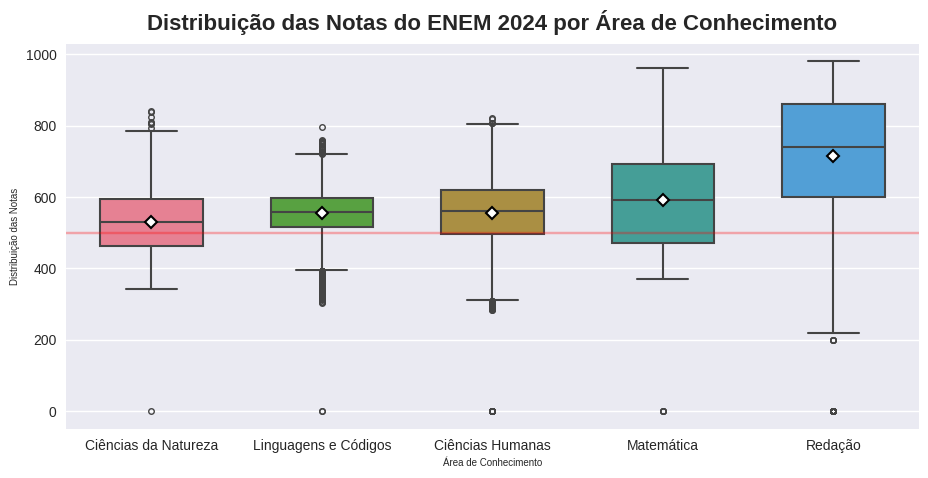

In [29]:
from matplotlib import lines
# Análise das Notas

analise_notas = (
    df_modelado[colunas_notas]
    .melt(var_name='provas', value_name='notas')
)

# Ajustar nomenclatura

nomes_provas = {
    'nu_nota_cn': 'Ciências da Natureza',
    'nu_nota_ch': 'Ciências Humanas',
    'nu_nota_lc': 'Linguagens e Códigos',
    'nu_nota_mt': 'Matemática',
    'nu_nota_redacao': 'Redação'
}

analise_notas['provas'] = analise_notas['provas'].map(nomes_provas)

# Ordenar Boxplot

order_boxplot = (
    analise_notas
    .groupby(by='provas')
    .agg(mediana=('notas', 'median'))
    .sort_values('mediana')
    .index
)

# Plot

plt.figure(figsize=(11, 5))
plt.title('Distribuição das Notas do ENEM 2024 por Área de Conhecimento', fontsize=16, fontweight='bold', pad=10)

sns.boxplot(
    data=analise_notas,
    x='provas',
    y='notas',
    width=0.6,
    linewidth=1.5,
    fliersize=4,
    hue='provas',
    legend=False,
    order=order_boxplot,
    showmeans=True,
    meanprops={'marker': 'D', 'markerfacecolor': 'white', 'markeredgecolor': 'black', 'markersize': '6', 'markeredgewidth': 1.5}
)

# Linha de referência

plt.axhline(y=500, color='red', linestyle='-', alpha=0.3, label='Nota 500')

# Labels

plt.xlabel('Área de Conhecimento', size=7)
plt.ylabel('Distribuição das Notas', size=7)


In [30]:
# Adicionar decis ao DF

for coluna in colunas_notas:
  df_modelado[coluna + '_decil'] = pd.qcut(df_modelado[coluna], q=10, labels=['D'+str(loop) for loop in range(1,11)])

df_modelado.sample(5)


,no_municipio_esc,sg_uf_esc,tp_adm_escola,tp_loc_escola,idioma_estrangeiro,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,status_redacao,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,nu_nota_redacao,nu_nota_cn_decil,nu_nota_ch_decil,nu_nota_lc_decil,nu_nota_mt_decil,nu_nota_redacao_decil
1526,Belo Horizonte,MG,Estadual,Urbana,Espanhol,1,1,1,1,sem_problemas,463.30,408.70,380.60,407.70,500.00,D3,D1,D1,D1,D1
5006,Belo Horizonte,MG,Estadual,Urbana,Inglês,1,1,1,1,sem_problemas,383.70,379.50,479.60,497.50,620.00,D1,D1,D2,D4,D3
13861,Belo Horizonte,MG,Privada,Urbana,Inglês,1,1,1,1,sem_problemas,614.50,622.90,632.40,753.30,960.00,D9,D8,D10,D9,D10
13409,Belo Horizonte,MG,Privada,Urbana,Inglês,1,1,1,1,sem_problemas,548.70,609.90,566.80,611.40,960.00,D6,D8,D6,D6,D10
699,Belo Horizonte,MG,Privada,Urbana,Inglês,1,1,1,1,sem_problemas,528.70,556.20,594.70,647.30,800.00,D5,D5,D8,D7,D6


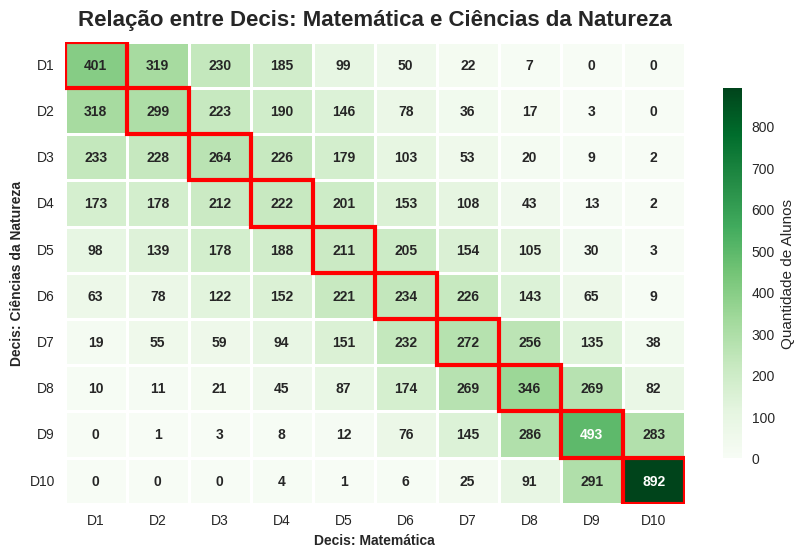

In [31]:
# Preparação dos Dados

movimento = (df_modelado.groupby(['nu_nota_cn_decil', 'nu_nota_mt_decil'])
            .size()
            .unstack()
            )

# DataViz

plt.figure(figsize=(10,6))
plt.title('Relação entre Decis: Matemática e Ciências da Natureza', fontsize=16, fontweight='bold', pad=12)

ax = sns.heatmap(
    movimento,
    annot=True,
    cmap='Greens',
    fmt='g',
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Quantidade de Alunos', 'shrink': 0.8},
    annot_kws={'fontsize': 10, 'fontweight': 'bold'}
)

# Labels

plt.xlabel('Decis: Matemática', size=10, fontweight='bold')
plt.ylabel('Decis: Ciências da Natureza', size=10, fontweight='bold')

# Rotacionar labels

plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Adicionar grade de referência

ax.set_facecolor('#f8f9fa')

# Destacar a diagonal (alunos consistentes)

for loop in range(len(movimento)):
  ax.add_patch(
      plt.Rectangle(
          (loop, loop),
          1,
          1,
          fill=None,
          edgecolor='red',
          linewidth=3
      )
  )

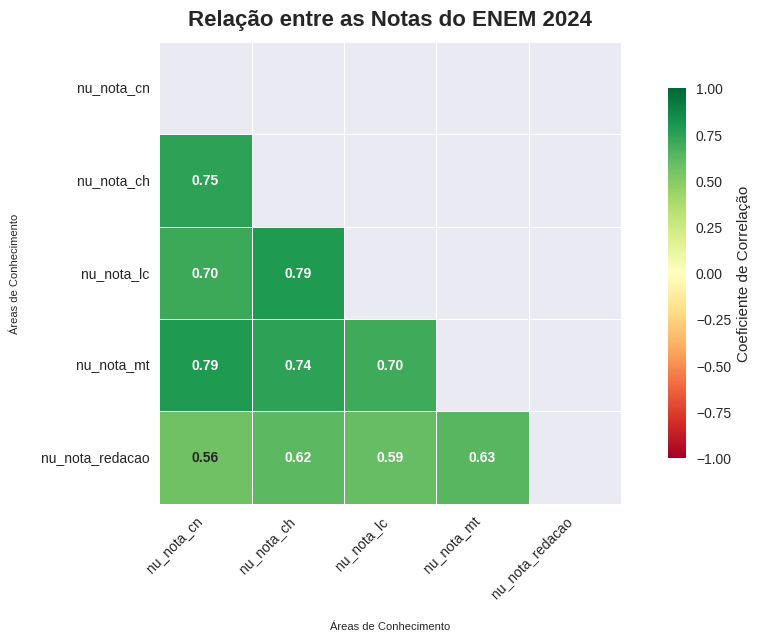

In [32]:
plt.figure(figsize=(12,6))

plt.title('Relação entre as Notas do ENEM 2024', fontsize=16, fontweight='bold', pad=12)

# Exibir metade da matriz

mask = np.triu(np.ones_like(df_modelado[colunas_notas].corr(), dtype=bool))

heatmap = sns.heatmap(
    df_modelado[colunas_notas].corr(),
    cmap='RdYlGn',
    annot=True,
    center=0,
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8, 'label': 'Coeficiente de Correlação'},
    fmt='.2f',
    annot_kws={'fontsize': 10, 'fontweight': 'bold'},
    mask=mask
)

# Melhorar rótulos

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.xlabel('Áreas de Conhecimento', size=8, labelpad=15)
plt.ylabel('Áreas de Conhecimento', size=8, labelpad=15)

plt.grid(False)

Text(0, 0.5, 'Distribuição das Notas')

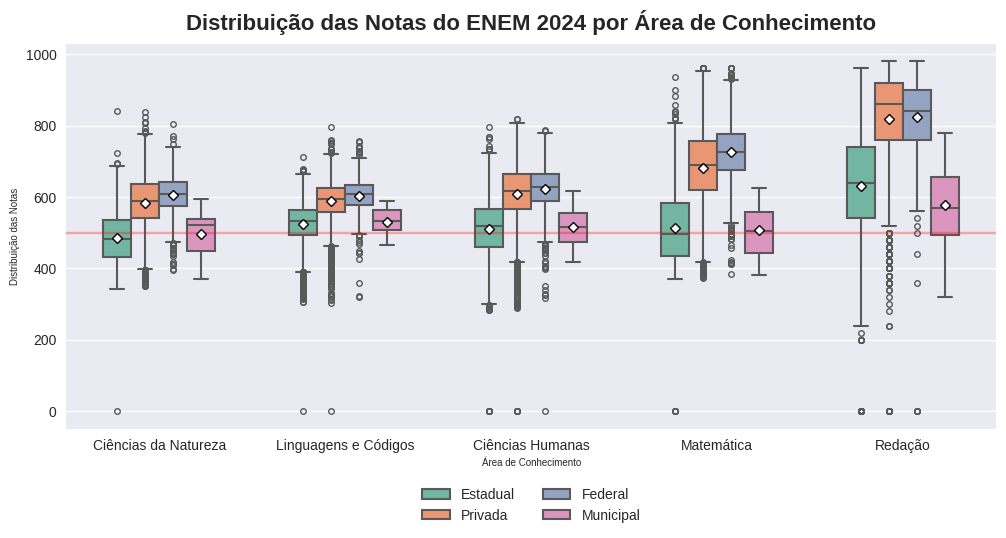

In [33]:
from numpy._core.fromnumeric import mean
# Análise das Notas

analise_notas = (
    df_modelado[colunas_notas + ['tp_adm_escola']]
    .melt(id_vars=['tp_adm_escola'],
          value_vars=colunas_notas,
          var_name='provas',
          value_name='notas')
)

# Ajuste nomenclatura das provas

nomes_provas = {
    'nu_nota_cn': 'Ciências da Natureza',
    'nu_nota_ch': 'Ciências Humanas',
    'nu_nota_lc': 'Linguagens e Códigos',
    'nu_nota_mt': 'Matemática',
    'nu_nota_redacao': 'Redação'
}

analise_notas['provas'] = analise_notas['provas'].map(nomes_provas)

# Ordenar boxplot

order_boxplot = (
    analise_notas
    .groupby(by='provas')
    .agg(mediana=('notas', 'median'))
    .sort_values('mediana')
    .index
)

plt.figure(figsize=(12, 5))
plt.title('Distribuição das Notas do ENEM 2024 por Área de Conhecimento', fontsize=16, fontweight='bold', pad=10)

sns.boxplot(
    data=analise_notas,
    x='provas',
    y='notas',
    width=0.6,
    linewidth=1.5,
    fliersize=4,
    hue='tp_adm_escola',
    legend=True,
    order=order_boxplot,
    showmeans=True,
    meanprops={'marker': 'D', 'markerfacecolor': 'white', 'markeredgecolor': 'black', 'markersize': '5', 'markeredgewidth': 1},
    palette='Set2'
)

plt.legend(bbox_to_anchor=(0.5, -0.12), loc='upper center', ncol=2)

# Adicionar linhas de referência

plt.axhline(y=500, color='red', linestyle='-', alpha=0.3, label='Nota 500')

# Labels

plt.xlabel('Área de Conhecimento', size=7)
plt.ylabel('Distribuição das Notas', size=7)

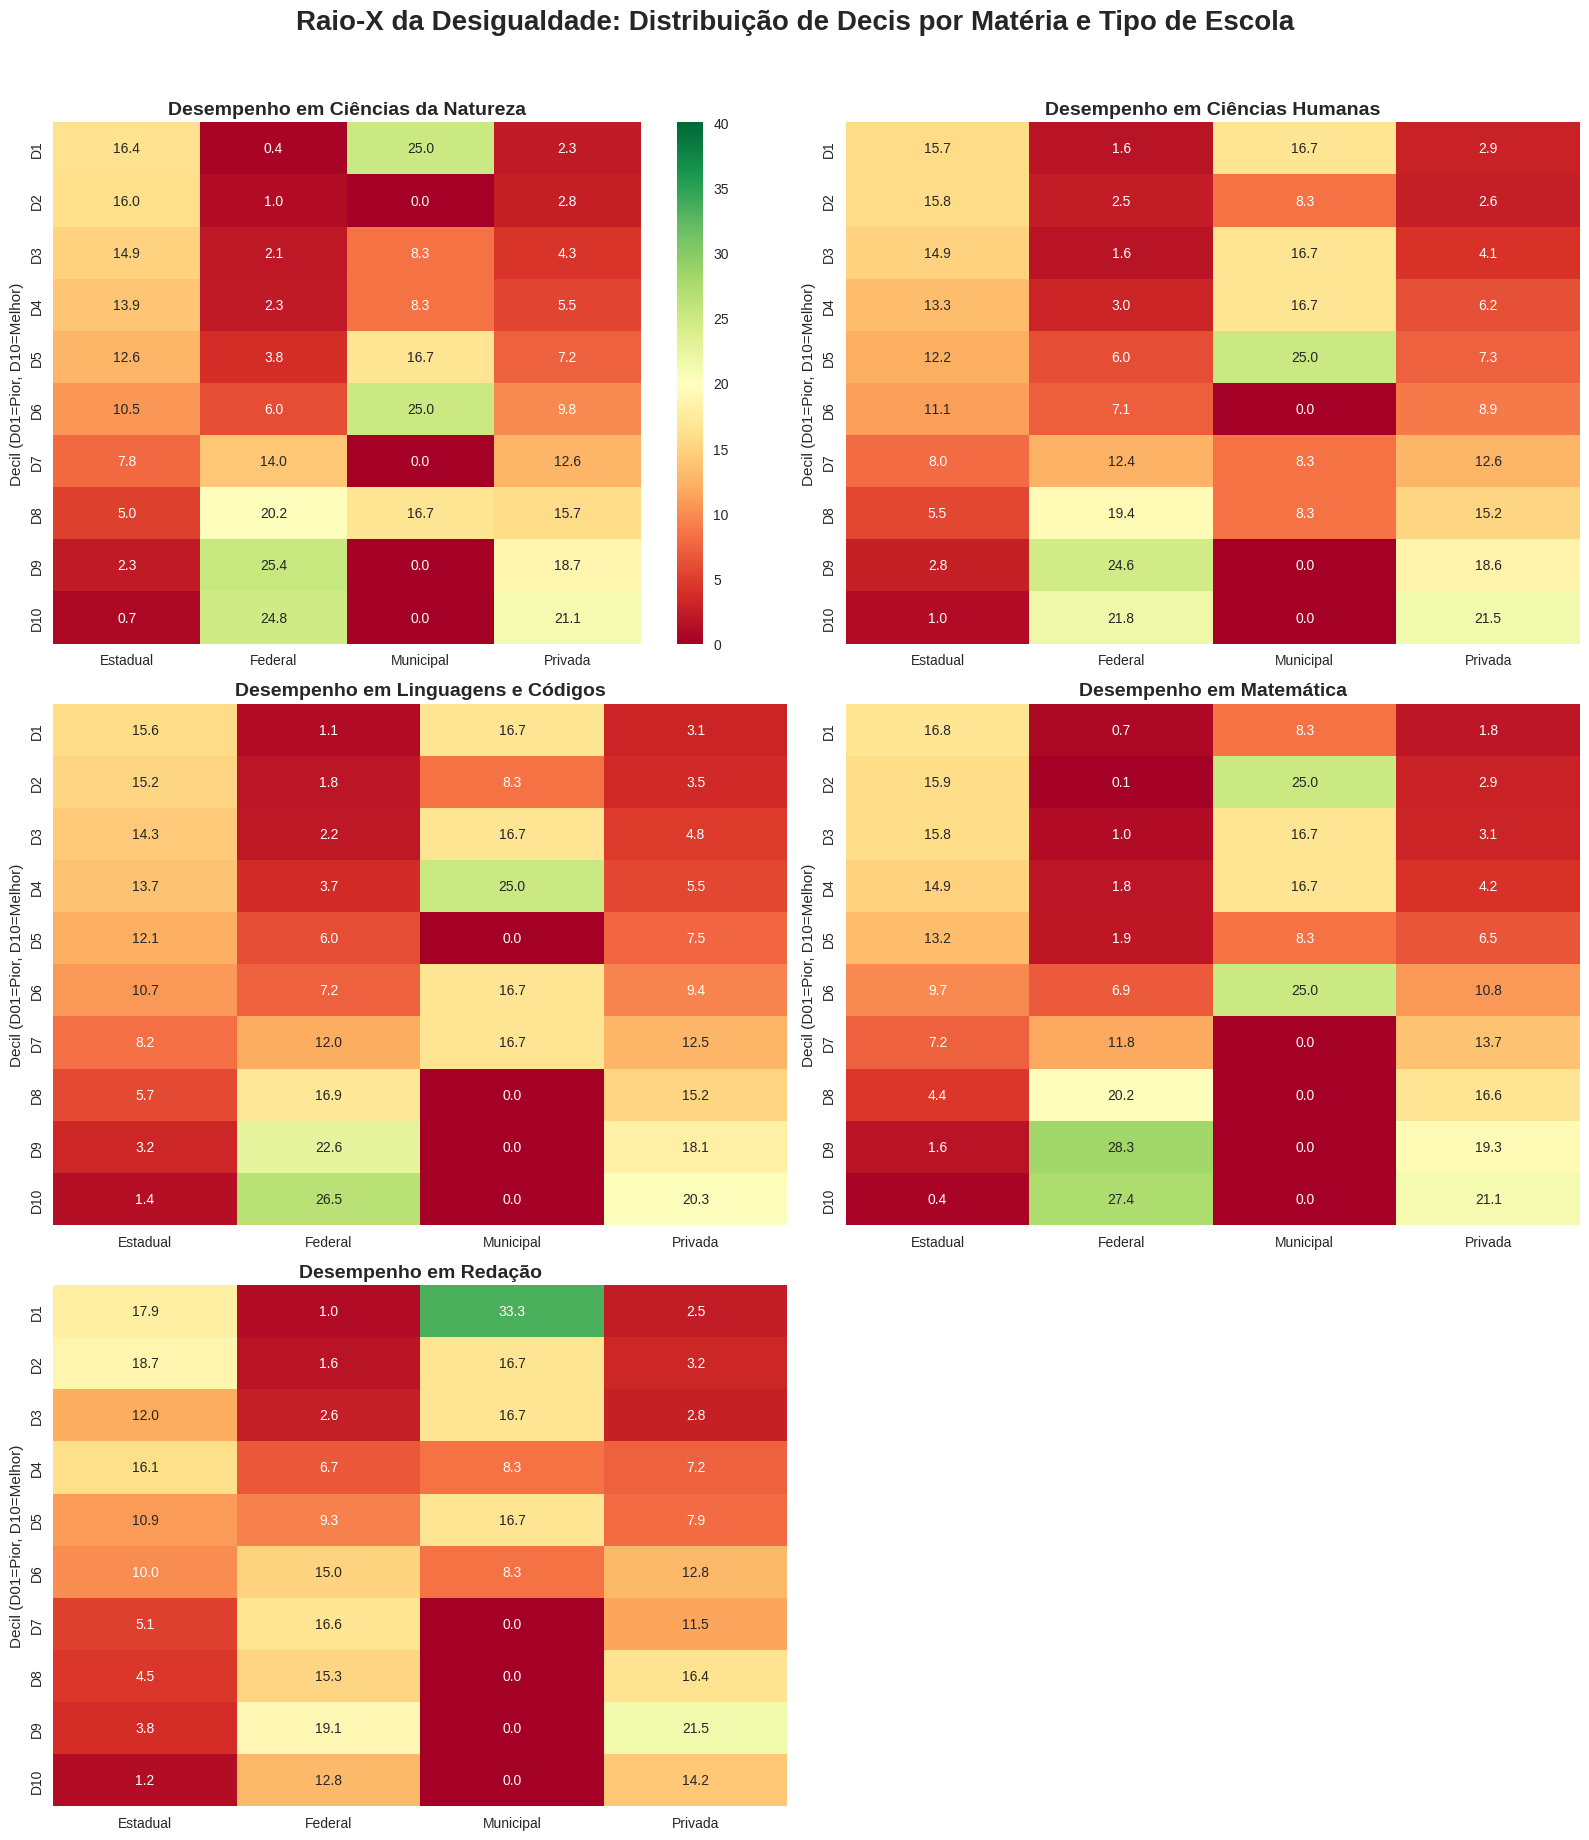

In [34]:
# Configuração da Grade de Gráficos (Subplots)

qtd_materias = len(colunas_notas)
cols = 2
rows = math.ceil(qtd_materias / cols)

# Definir o tamanho da figura
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 6))
fig.suptitle('Raio-X da Desigualdade: Distribuição de Decis por Matéria e Tipo de Escola',
             fontsize=20, fontweight='bold', y=1.02)

axes_flat = axes.flatten()

# Loop para Gerar um Heatmap por Matéria
for i, coluna in enumerate(colunas_notas):
    ax = axes_flat[i]

    # Garante que a coluna de decil exista
    col_decil = f'{coluna}_decil'
    if col_decil not in df_modelado.columns:
        # Se não existir, calcula na hora
        df_modelado[col_decil] = pd.qcut(df_modelado[coluna], q=10, labels=labels_decil)

    # Cria a Tabela Cruzada (Pivot)
    tabela_cruzada = pd.crosstab(
        index=df_modelado[col_decil],
        columns=df_modelado['tp_adm_escola'],
        normalize='columns'
    ).multiply(100)

    # Desenha o Heatmap
    sns.heatmap(
        tabela_cruzada,
        annot=True,
        fmt=".1f",
        cmap="RdYlGn",
        ax=ax,
        cbar=i == 0,
        vmin=0, vmax=40
    )

    # Formatação de cada gráfico
    nome_titulo = nomes_provas.get(coluna, coluna)
    ax.set_title(f'Desempenho em {nome_titulo}', fontsize=14, fontweight='bold')
    ax.set_ylabel('Decil (D01=Pior, D10=Melhor)')
    ax.set_xlabel('')

# Limpeza Final se o número de gráficos for ímpar, remove o último quadrado vazio
if qtd_materias % 2 != 0:
    fig.delaxes(axes_flat[-1])

plt.tight_layout()
plt.show()

In [35]:
# Criando um dicionário para agrupar as categorias
mapa_publica_privada = {
    'Privada': 'Privada',
    'Estadual': 'Pública',
    'Municipal': 'Pública',
    'Federal': 'Pública'
}

# Criando a nova coluna no DataFrame
df_modelado['tipo_escola_agrupada'] = df_modelado['tp_adm_escola'].map(mapa_publica_privada)

# Verificando a proporção
print("--- Distribuição de Alunos (Pública vs Privada) ---")
display(df_modelado['tipo_escola_agrupada'].value_counts())
display(df_modelado['tipo_escola_agrupada'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

--- Distribuição de Alunos (Pública vs Privada) ---


,count
tipo_escola_agrupada,
Pública,9802
Privada,5335


,proportion
tipo_escola_agrupada,
Pública,64.8%
Privada,35.2%


In [40]:
import plotly.express as px

# Rótulos para garantir a ordenação correta de D01 a D10
labels_padrao = [f'D{i:02d}' for i in range(1, 11)]

for col in colunas_notas:
    df_modelado[f'{col}_decil_padrao'] = pd.qcut(
        df_modelado[col].rank(method='first'),
        q=10,
        labels=labels_padrao
    )

# Agregar Dados
df_plot_final = pd.DataFrame()
coluna_categoria = 'tipo_escola_agrupada'

for materia in colunas_notas:
    col_decil = f'{materia}_decil_padrao'
    nome_materia_bonito = nomes_provas.get(materia, materia)

    # Agrupa por Materia, Decil e Tipo de Escola
    df_agg = df_modelado.groupby([col_decil, coluna_categoria], observed=False).size().reset_index(name='Qtd')

    # Calcula a porcentagem de cada rede dentro de cada Decil
    df_agg['Porcentagem'] = (df_agg['Qtd'] / df_agg.groupby(col_decil)['Qtd'].transform('sum') * 100).round(2)

    df_agg['Materia'] = nome_materia_bonito
    df_agg = df_agg.rename(columns={col_decil: 'Decil'})

    df_plot_final = pd.concat([df_plot_final, df_agg])

# Plot
fig = px.bar(
    df_plot_final,
    y='Decil',
    x='Porcentagem',
    color=coluna_categoria,
    facet_col='Materia',
    facet_col_wrap=2,
    orientation='h',
    text='Porcentagem',
    # Cores contrastantes para Publica vs Privada
    color_discrete_map={'Pública': '#1f77b4', 'Privada': '#2ca02c'},
    category_orders={'Decil': labels_padrao},
    title="<b>Distribuicao por Decil: Publica vs. Privada</b><br><sup>Proporcao de cada rede de ensino em cada faixa de desempenho</sup>"
)

# Ajustes
fig.update_traces(
    texttemplate='%{text}%',
    textposition='inside'
)

fig.update_layout(
    height=1100,
    barmode='stack',
    legend_title_text='Rede de Ensino',
    font=dict(size=12)
)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

In [41]:
resultados_desigualdade = []
coluna_categoria = 'tipo_escola_agrupada'

for materia in colunas_notas:
    col_decil = f'{materia}_decil_padrao'
    nome_materia = nomes_provas.get(materia, materia)

    # Criamos uma tabela cruzada de frequencia relativa (porcentagem por rede)
    # Isso nos diz: dos alunos daquela rede, quantos % estao em cada decil
    tabela_relativa = pd.crosstab(
        df_modelado[coluna_categoria],
        df_modelado[col_decil],
        normalize='index'
    ) * 100

    # Extraimos as porcentagens da Elite (D10) e da Base (D01)
    perc_privada_d10 = tabela_relativa.loc['Privada', 'D10']
    perc_publica_d10 = tabela_relativa.loc['Pública', 'D10']

    perc_privada_d01 = tabela_relativa.loc['Privada', 'D01']
    perc_publica_d01 = tabela_relativa.loc['Pública', 'D01']

    # Calculo da Razao de Elite: Quantas vezes a Privada supera a Publica no D10
    razao_elite = perc_privada_d10 / perc_publica_d10

    resultados_desigualdade.append({
        'Materia': nome_materia,
        'Privada_no_D10_%': round(perc_privada_d10, 2),
        'Publica_no_D10_%': round(perc_publica_d10, 2),
        'Razao_de_Elite': round(razao_elite, 1),
        'Privada_no_D01_%': round(perc_privada_d01, 2),
        'Publica_no_D01_%': round(perc_publica_d01, 2)
    })

# Exibição dos resultados
df_ranking = pd.DataFrame(resultados_desigualdade).sort_values(by='Razao_de_Elite', ascending=False)

print("Analise de Desigualdade: Elite (D10) vs Base (D01)")
display(df_ranking)

# Insigth
materia_critica = df_ranking.iloc[0]['Materia']
valor_critico = df_ranking.iloc[0]['Razao_de_Elite']

print(f"\nInsight Principal:")
print(f"A maior desigualdade ocorre em {materia_critica}, onde um aluno da rede privada")
print(f"tem {valor_critico} vezes mais chance de estar entre as melhores notas (D10)")
print(f"do que um aluno da rede publica.")

Analise de Desigualdade: Elite (D10) vs Base (D01)


,Materia,Privada_no_D10_%,Publica_no_D10_%,Razao_de_Elite,Privada_no_D01_%,Publica_no_D01_%
1,Ciências Humanas,21.59,2.80,7.70,2.92,14.41
0,Ciências da Natureza,21.14,2.90,7.30,2.31,14.91
3,Matemática,21.14,2.90,7.30,1.78,15.25
2,Linguagens e Códigos,20.35,3.57,5.70,3.10,14.31
4,Redação,20.12,3.71,5.40,2.21,14.86



Insight Principal:
A maior desigualdade ocorre em Ciências Humanas, onde um aluno da rede privada
tem 7.7 vezes mais chance de estar entre as melhores notas (D10)
do que um aluno da rede publica.


In [46]:
# Exportar para a camada Ouro

local_export_ouro = local.replace('prata', 'ouro')

df_modelado.to_parquet(
    path=local_export_ouro + 'dados_belo_horizonte_analise_final.parquet.gzip',
    compression='gzip',
    index=False
)

df_ranking.to_parquet(
    path=local_export_ouro + 'ranking_desigualdade_elite_bh.parquet.gzip',
    compression='gzip',
    index=False
)